<a href="https://colab.research.google.com/github/kalebcwag/Sneakers-and-Streetwears-Sales-Analytics/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sneakers and streetwear sales data analytics

#### Dataset URL: https://www.kaggle.com/datasets/atharvasoundankar/sneakers-and-streetwear-sales-2022

## A project for my data analytical and prompt programming portfolio. Thought of these questions myself based on what could I possibly gain from the data. The code was made with the help of Colab's Gemini AI, with adjustments if needed. If the block of codes was generated with AI, the prompts would be written on the first line of each blocks of code.

Questions:
<ol>
<li>Which type of sneakers did Nike sell the most?</li>
<li>Which company had the most unisex products?</li>
<li>Which type of payment do the Japanese prefer?</li>
<li>Which company sold the most product in 2022?</li>
<li>How much did the company gain throughout 2022?</li>
<li>Is there any company that gained more money eventhough they sold less product? If yes, what is it?</li>
<li>How many types of product in this data?</li>
<li>How many units of "Fear of God Essentials Tee" sold in the third quarter of 2022?</li>
<li>Which payment method was the least relevant in 2022?</li>
<li>How was the growth of each company throughout each month 2022?</li>
</ol>

# Collect data

In [105]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("atharvasoundankar/sneakers-and-streetwear-sales-2022")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/sneakers-and-streetwear-sales-2022


# Import libraries

In [106]:
import pandas
import matplotlib.pyplot as plt
import numpy as np

# Preview data

In [107]:
df = pandas.read_csv(path + "/sneakers_streetwear_sales_data.csv")
df

,Date,Product Name,Product Type,Brand,Gender,Category,Country,Quantity,Unit Price ($),Amount ($),Payment Mode
0,2022-05-27,Fear of God Essentials Tee,T-shirt,Essentials,Unisex,Limited Edition,Japan,5,141.82,709.10,Card
1,2022-08-22,Yeezy Boost 350,Sneakers,Adidas,Unisex,Streetwear,USA,2,267.34,534.68,Cash on Delivery
2,2022-04-03,Nike Dunk Low,Sneakers,Nike,Women,Limited Edition,Germany,1,292.00,292.00,Cash on Delivery
3,2022-07-13,Nike Tech Fleece,Hoodie,Nike,Men,Limited Edition,USA,4,245.44,981.76,Cash on Delivery
4,2022-08-25,Jordan 1 High,Sneakers,Nike,Women,Casual,Australia,2,184.51,369.02,Cash on Delivery
...,...,...,...,...,...,...,...,...,...,...,...
348,2022-04-08,Jordan 1 High,Sneakers,Nike,Men,Casual,India,5,94.25,471.25,Wallet
349,2022-08-03,Nike Tech Fleece,Hoodie,Nike,Women,Casual,Germany,5,259.00,1295.00,Card
350,2022-05-05,Puma Joggers,Joggers,Puma,Women,Casual,Germany,4,299.73,1198.92,Cash on Delivery
351,2022-05-19,Adidas Ultraboost,Sneakers,Adidas,Men,Casual,Canada,5,71.26,356.30,Cash on Delivery


# Q1: Which type of sneakers did Nike sell the most?

In [108]:
sneakers_data = df[(df["Brand"] == "Nike") & (df["Product Type"] == "Sneakers")]
sneakers_data.reset_index(drop=True, inplace=True)

sneakers_data

,Date,Product Name,Product Type,Brand,Gender,Category,Country,Quantity,Unit Price ($),Amount ($),Payment Mode
0,2022-04-03,Nike Dunk Low,Sneakers,Nike,Women,Limited Edition,Germany,1,292.00,292.00,Cash on Delivery
1,2022-08-25,Jordan 1 High,Sneakers,Nike,Women,Casual,Australia,2,184.51,369.02,Cash on Delivery
2,2022-06-20,Jordan 1 High,Sneakers,Nike,Women,Streetwear,USA,3,199.47,598.41,Wallet
3,2022-01-02,Jordan 1 High,Sneakers,Nike,Unisex,Sportswear,Japan,4,298.22,1192.88,Wallet
4,2022-08-26,Nike Dunk Low,Sneakers,Nike,Women,Casual,Germany,3,295.75,887.25,Card
...,...,...,...,...,...,...,...,...,...,...,...
61,2022-03-01,Jordan 1 High,Sneakers,Nike,Women,Sportswear,Canada,3,235.36,706.08,Wallet
62,2022-01-01,Nike Dunk Low,Sneakers,Nike,Women,Streetwear,Japan,2,294.89,589.78,Wallet
63,2022-03-10,Jordan 1 High,Sneakers,Nike,Women,Sportswear,USA,1,208.24,208.24,Cash on Delivery
64,2022-04-08,Jordan 1 High,Sneakers,Nike,Men,Casual,India,5,94.25,471.25,Wallet


In [109]:
sneakers_data_by_names = sneakers_data.groupby("Product Name", as_index=False).sum()

sneakers_data_by_names = sneakers_data_by_names[["Product Name", "Quantity"]]

sneakers_data_by_names

,Product Name,Quantity
0,Jordan 1 High,113
1,Nike Dunk Low,112


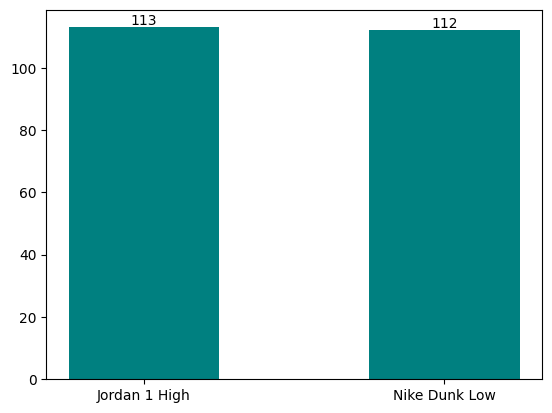

In [110]:
plt.bar(sneakers_data_by_names["Product Name"], sneakers_data_by_names["Quantity"], width=0.5, color="teal")
plt.xticks(rotation=0)
plt.margins(x=0.05)

plt.title("Sneakers Nike Sold 2022")

for i, value in enumerate(sneakers_data_by_names["Quantity"]):
    plt.text(i, value, str(value), ha="center", va="bottom")

plt.show()

#Q2: Which company had the most unisex products?

In [111]:
unisex_products = df[(df["Gender"] == "Unisex")]
unisex_products.reset_index(drop=True, inplace=True)

unisex_products

,Date,Product Name,Product Type,Brand,Gender,Category,Country,Quantity,Unit Price ($),Amount ($),Payment Mode
0,2022-05-27,Fear of God Essentials Tee,T-shirt,Essentials,Unisex,Limited Edition,Japan,5,141.82,709.10,Card
1,2022-08-22,Yeezy Boost 350,Sneakers,Adidas,Unisex,Streetwear,USA,2,267.34,534.68,Cash on Delivery
2,2022-01-02,Jordan 1 High,Sneakers,Nike,Unisex,Sportswear,Japan,4,298.22,1192.88,Wallet
3,2022-02-08,Supreme Hoodie,Hoodie,Supreme,Unisex,Casual,India,1,54.44,54.44,Cash on Delivery
4,2022-08-25,Adidas Ultraboost,Sneakers,Adidas,Unisex,Casual,USA,1,104.16,104.16,Wallet
...,...,...,...,...,...,...,...,...,...,...,...
87,2022-01-22,Yeezy Boost 350,Sneakers,Adidas,Unisex,Limited Edition,India,4,206.29,825.16,Wallet
88,2022-01-14,Puma Joggers,Joggers,Puma,Unisex,Limited Edition,Australia,5,289.47,1447.35,Card
89,2022-06-06,Nike Tech Fleece,Hoodie,Nike,Unisex,Limited Edition,Germany,5,123.23,616.15,Wallet
90,2022-06-29,Off-White Hoodie,Hoodie,Off-White,Unisex,Sportswear,Germany,2,54.76,109.52,Wallet


In [112]:
unisex_products = unisex_products[["Brand", "Gender"]]
unisex_products_brand = unisex_products[unisex_products["Gender"] == "Unisex"]["Brand"]
unisex_products_count = unisex_products_brand.value_counts()

unisex_products_count

,count
Brand,
Nike,26
Adidas,21
Off-White,12
Puma,11
Essentials,10
Supreme,6
New Era,6


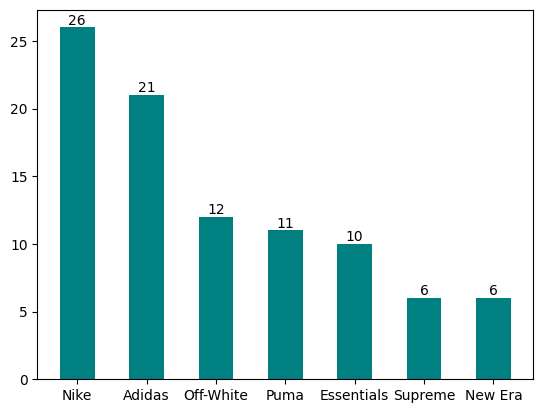

In [113]:
plt.bar(unisex_products_count.index, unisex_products_count.values, width=0.5, color="teal")
plt.xticks(rotation=0)
plt.margins(x=0.05)

plt.title("Unisex Products Sold by Each Companies")

for i, value in enumerate(unisex_products_count.values):
    plt.text(i, value, str(value), ha="center", va="bottom")

plt.show()

# Q3: Which type of payment do the Japanese prefer?

In [114]:
payments = df[["Country", "Payment Mode"]]
payments = payments[payments["Country"] == "Japan"]
payments.reset_index(drop=True, inplace=True)

japanese_payments = payments["Payment Mode"].value_counts()

japanese_payments

,count
Payment Mode,
Wallet,15
Card,13
UPI,12
Cash on Delivery,12


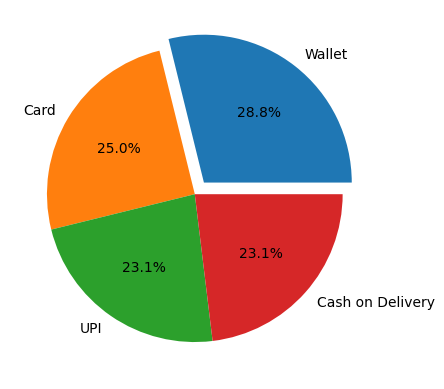

In [115]:
plt.pie(japanese_payments.values, labels=japanese_payments.index, autopct="%1.1f%%", explode=[0.1,0,0,0])
plt.title("Preferred Japanese Payment Method")

plt.show()

# Q4: Which company sold the most product in 2022?

In [116]:
companies = df["Brand"]

companies_sold = companies.value_counts()

companies_sold

,count
Brand,
Nike,107
Adidas,70
Off-White,48
Puma,41
Supreme,32
New Era,29
Essentials,26


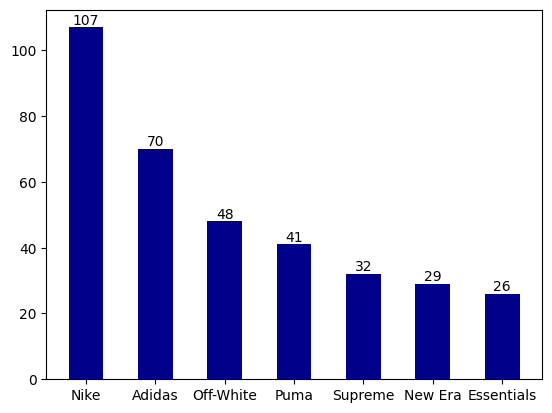

In [117]:
plt.bar(companies_sold.index, companies_sold.values, width=0.5, color="darkblue")
plt.xticks(rotation=0)
plt.margins(x=0.05)

plt.title("Product Sold by Each Companies")

for i, value in enumerate(companies_sold.values):
    plt.text(i, value, str(value), ha="center", va="bottom")

plt.show()

#Q5: How much did the company gain throughout 2022?

In [118]:
gains = df[["Brand", "Amount ($)"]]

gains_by_company = gains.groupby("Brand", as_index=False).sum()

gains_by_company = gains_by_company[["Brand", "Amount ($)"]]

gains_by_company

,Brand,Amount ($)
0,Adidas,36858.43
1,Essentials,13149.25
2,New Era,13915.46
3,Nike,67975.58
4,Off-White,24214.82
5,Puma,21342.02
6,Supreme,15647.51


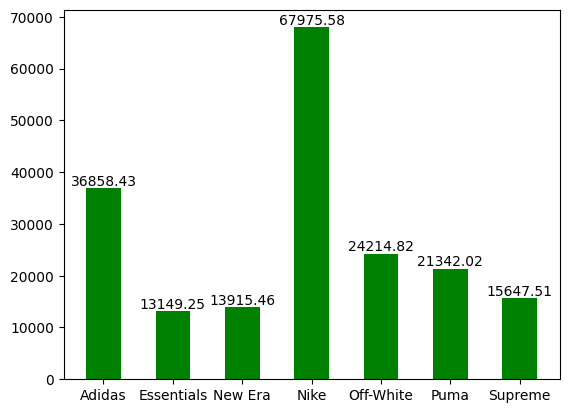

In [119]:
plt.bar(gains_by_company["Brand"].values, gains_by_company["Amount ($)"].values, width=0.5, color="green")
plt.xticks(rotation=0)
plt.margins(x=0.05)

plt.title("Earning by Each Companies")

for i, value in enumerate(gains_by_company["Amount ($)"].values):
    plt.text(i, value, str(value), ha="center", va="bottom")

plt.show()

#Q6: Is there any company that gained more money eventhough they sold less product? If yes, what is it?

In [120]:
gains2 = df[["Brand", "Amount ($)", "Quantity"]]

gains2_by_company = gains2.groupby("Brand", as_index=False).sum()

gains2_by_company = gains2_by_company[["Brand", "Quantity","Amount ($)"]]

gains2_by_company

,Brand,Quantity,Amount ($)
0,Adidas,210,36858.43
1,Essentials,80,13149.25
2,New Era,88,13915.46
3,Nike,365,67975.58
4,Off-White,143,24214.82
5,Puma,116,21342.02
6,Supreme,95,15647.51


In [134]:
# Iterate through gains2_by_company to find if there are brands that sells less (Quantity) but gain more (Amount ($))

# Sort the DataFrame by Quantity in ascending order and then by Amount ($) in descending order
sorted_gains = gains2_by_company.sort_values(by=['Quantity', 'Amount ($)'], ascending=[True, False])

templist = [] #added

print("Companies that gained more money even though they sold less product:")
for i in range(1, len(sorted_gains)):
    if sorted_gains.iloc[i]['Amount ($)'] > sorted_gains.iloc[i-1]['Amount ($)'] and sorted_gains.iloc[i]['Quantity'] < sorted_gains.iloc[i-1]['Quantity']:
        s = f"- {sorted_gains.iloc[i]['Brand']}" #modified
        print(s) #added
        templist.append(s) #added

if len(templist) == 0: #added
    print("None") #added

Companies that gained more money even though they sold less product:
None


#Q7: How many types of product in this data?

In [139]:
product_types = df[["Product Type"]]

product_types = product_types.groupby("Product Type", as_index=False).count()

print(f"There are {len(product_types)} types of product:")
for i in range(len(product_types)):
    print(f"- {product_types.iloc[i]['Product Type']}")

There are 5 types of product:
- Cap
- Hoodie
- Joggers
- Sneakers
- T-shirt


#Q8: How many units of "Fear of God Essentials Tee" sold in the third quarter of 2022?

In [142]:
fog_q3 = df[(df["Product Name"] == "Fear of God Essentials Tee")]

fog_q3 = fog_q3[(fog_q3["Date"] >= "2022-07-01") & (fog_q3["Date"] < "2022-10-01")].reset_index(drop=True)

fog_q3

,Date,Product Name,Product Type,Brand,Gender,Category,Country,Quantity,Unit Price ($),Amount ($),Payment Mode
1,2022-07-12,Fear of God Essentials Tee,T-shirt,Essentials,Women,Limited Edition,Germany,1,207.85,207.85,Wallet
2,2022-07-11,Fear of God Essentials Tee,T-shirt,Essentials,Women,Sportswear,India,3,167.36,502.08,UPI
6,2022-07-16,Fear of God Essentials Tee,T-shirt,Essentials,Unisex,Limited Edition,UK,5,137.90,689.50,UPI
7,2022-07-24,Fear of God Essentials Tee,T-shirt,Essentials,Unisex,Limited Edition,Germany,4,57.22,228.88,Cash on Delivery
11,2022-08-30,Fear of God Essentials Tee,T-shirt,Essentials,Men,Sportswear,UK,2,111.36,222.72,Card
13,2022-07-26,Fear of God Essentials Tee,T-shirt,Essentials,Unisex,Streetwear,USA,1,106.59,106.59,Card
18,2022-08-18,Fear of God Essentials Tee,T-shirt,Essentials,Men,Sportswear,Canada,4,250.12,1000.48,Card
21,2022-08-24,Fear of God Essentials Tee,T-shirt,Essentials,Men,Casual,India,2,158.70,317.40,Wallet
22,2022-08-11,Fear of God Essentials Tee,T-shirt,Essentials,Unisex,Casual,Japan,1,157.81,157.81,Cash on Delivery


In [145]:
fog_sold = fog_q3["Quantity"].sum()

print(f"There are {fog_sold} Fear of God Essentials Tee's sold throughout the third quarter of 2022.")

There are 23 Fear of God Essentials Tee's sold throughout the third quarter of 2022.


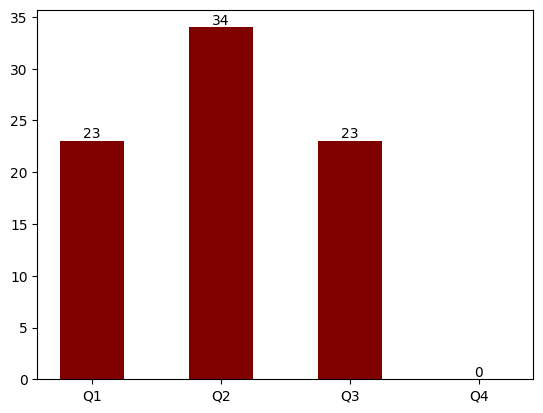

In [155]:
fog_q1 = df[(df["Product Name"] == "Fear of God Essentials Tee") & (df["Date"] >= "2022-01-01") & (df["Date"] < "2022-04-01")].reset_index(drop=True)
fog_q2 = df[(df["Product Name"] == "Fear of God Essentials Tee") & (df["Date"] >= "2022-04-01") & (df["Date"] < "2022-07-01")].reset_index(drop=True)
fog_q3 = df[(df["Product Name"] == "Fear of God Essentials Tee") & (df["Date"] >= "2022-07-01") & (df["Date"] < "2022-10-01")].reset_index(drop=True)
fog_q4 = df[(df["Product Name"] == "Fear of God Essentials Tee") & (df["Date"] >= "2022-10-01") & (df["Date"] < "2023-01-01")].reset_index(drop=True)

fog_q1_sold = fog_q1["Quantity"].sum()
fog_q2_sold = fog_q2["Quantity"].sum()
fog_q3_sold = fog_q3["Quantity"].sum()
fog_q4_sold = fog_q4["Quantity"].sum()

labels = ["Q1", "Q2", "Q3", "Q4"]
sizes = [fog_q1_sold, fog_q2_sold, fog_q3_sold, fog_q4_sold]

explode = [0,0,0,0]
explode[sizes.index(max(sizes))] = 0.1

plt.bar(labels, sizes, width=0.5, color="maroon")
plt.xticks(rotation=0)
plt.margins(x=0.05)

plt.title("Fear of God Essentials Tee sold in each quarter of 2022")

for i, value in enumerate(sizes):
    plt.text(i, value, str(value), ha="center", va="bottom")

plt.show()

In [158]:
total_fog_sold = sum(sizes)

print(f"{total_fog_sold} Fear of God Essentials Tee products sold overall.")

80 Fear of God Essentials Tee products sold overall.


#Q9: Which payment method was the least relevant in 2022?

In [165]:
payment_methods = df[["Payment Mode"]]

payment_methods = payment_methods.groupby("Payment Mode", as_index=False).value_counts()

payment_methods

,Payment Mode,count
0,Card,89
1,Cash on Delivery,102
2,UPI,73
3,Wallet,89


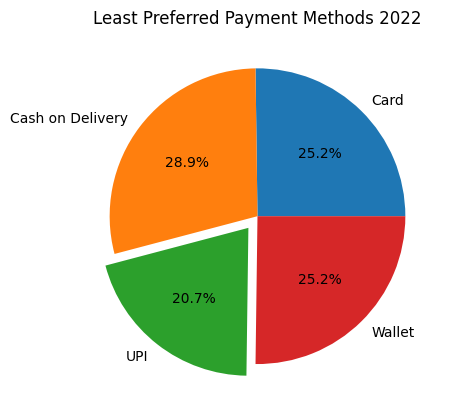

In [166]:
explode = [0,0,0,0]
explode[payment_methods["count"].idxmin()] = 0.1

plt.pie(payment_methods["count"].values, labels=payment_methods["Payment Mode"].values, autopct="%1.1f%%", explode=explode)
plt.title("Least Preferred Payment Methods 2022")

plt.show()

#Q10: How was the growth of each company throughout each month 2022?